# Pollution

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('pollution.csv')

In [2]:
df.head(5)

hour  small_part  med_part  sulf_diox  nitr_diox  trioxygen  temp    pres  \
0    23        13.0      43.0        1.0       19.0       29.0   7.6  1021.3   
1    21        77.0     115.0       31.0       74.0       10.0   0.0  1015.0   
2    21        86.0     141.0        9.0       43.0      198.0  29.3  1000.9   
3    11         NaN       NaN        NaN        NaN       20.0  14.2  1015.2   
4     0        77.0      57.0       41.0       48.0       16.0  -1.0  1024.2   

   rain wind  wind_sp         date  carb_monox  
0   0.0  NNW      2.5  23-Oct-2014     200.000  
1   0.0    W      0.7   9-Jan-2016    2100.000  
2   0.0  SSE      0.4  11-Jul-2016     700.000  
3   0.0  ESE      1.9  29-Oct-2015    1222.923  
4   0.0  SSW      1.3   7-Feb-2015    1300.000

In [3]:
df.isnull().sum()

hour            0
small_part    332
med_part      251
sulf_diox     309
nitr_diox     338
trioxygen     437
temp           15
pres           14
rain           15
wind           45
wind_sp        11
date            0
carb_monox      0
dtype: int64

## Split categorical/continuos variables

In [4]:
df.columns

Index(['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'rain', 'wind', 'wind_sp', 'date', 'carb_monox'],
      dtype='object')

In [5]:
df.dtypes

hour            int64
small_part    float64
med_part      float64
sulf_diox     float64
nitr_diox     float64
trioxygen     float64
temp          float64
pres          float64
rain          float64
wind           object
wind_sp       float64
date           object
carb_monox    float64
dtype: object

In [6]:
df.isna().any()

hour          False
small_part     True
med_part       True
sulf_diox      True
nitr_diox      True
trioxygen      True
temp           True
pres           True
rain           True
wind           True
wind_sp        True
date          False
carb_monox    False
dtype: bool

In [7]:
#df.fillna(df.mean(),inplace=True)
# Fill NaN values only in numeric columns with their mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)


In [8]:
df[['day','month','year']]=df['date'].str.split('-', expand=True)

In [9]:
df.head()

hour  small_part    med_part  sulf_diox  nitr_diox  trioxygen  temp  \
0    23   13.000000   43.000000   1.000000  19.000000       29.0   7.6   
1    21   77.000000  115.000000  31.000000  74.000000       10.0   0.0   
2    21   86.000000  141.000000   9.000000  43.000000      198.0  29.3   
3    11   78.745237  103.551407  16.060271  52.454812       20.0  14.2   
4     0   77.000000   57.000000  41.000000  48.000000       16.0  -1.0   

     pres  rain wind  wind_sp         date  carb_monox day month  year  
0  1021.3   0.0  NNW      2.5  23-Oct-2014     200.000  23   Oct  2014  
1  1015.0   0.0    W      0.7   9-Jan-2016    2100.000   9   Jan  2016  
2  1000.9   0.0  SSE      0.4  11-Jul-2016     700.000  11   Jul  2016  
3  1015.2   0.0  ESE      1.9  29-Oct-2015    1222.923  29   Oct  2015  
4  1024.2   0.0  SSW      1.3   7-Feb-2015    1300.000   7   Feb  2015

In [10]:
df.dtypes

hour            int64
small_part    float64
med_part      float64
sulf_diox     float64
nitr_diox     float64
trioxygen     float64
temp          float64
pres          float64
rain          float64
wind           object
wind_sp       float64
date           object
carb_monox    float64
day            object
month          object
year           object
dtype: object

In [11]:
df.drop(['date'],axis=1,inplace=True)

In [12]:
df['day']=pd.to_numeric(df['day'])

In [13]:
#df['year']=pd.to_numeric(df['year'])

In [14]:
df_categorical=df.select_dtypes(include=['object'])
#df_categorical=df[[]]
df_categorical.head()

wind month  year
0  NNW   Oct  2014
1    W   Jan  2016
2  SSE   Jul  2016
3  ESE   Oct  2015
4  SSW   Feb  2015

In [15]:
df_numerical=df.select_dtypes(include=['int64','float64'])
#df_numerical=df[[ ]]
df_numerical.head()

hour  small_part    med_part  sulf_diox  nitr_diox  trioxygen  temp  \
0    23   13.000000   43.000000   1.000000  19.000000       29.0   7.6   
1    21   77.000000  115.000000  31.000000  74.000000       10.0   0.0   
2    21   86.000000  141.000000   9.000000  43.000000      198.0  29.3   
3    11   78.745237  103.551407  16.060271  52.454812       20.0  14.2   
4     0   77.000000   57.000000  41.000000  48.000000       16.0  -1.0   

     pres  rain  wind_sp  carb_monox  day  
0  1021.3   0.0      2.5     200.000   23  
1  1015.0   0.0      0.7    2100.000    9  
2  1000.9   0.0      0.4     700.000   11  
3  1015.2   0.0      1.9    1222.923   29  
4  1024.2   0.0      1.3    1300.000    7

## Categorical data

C:\Users\danil\AppData\Local\Temp\ipykernel_34860\2418047873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='wind', y="carb_monox", kind="box", order=sorted_vals, palette="Set3", height=4).tick_params(axis='x', rotation=90)
C:\Users\danil\AppData\Local\Temp\ipykernel_34860\2418047873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='month', y="carb_monox", kind="box", order=sorted_vals, palette="Set3", height=4).tick_params(axis='x', rotation=90)
C:\Users\danil\AppData\Local\Temp\ipykernel_34860\2418047873.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

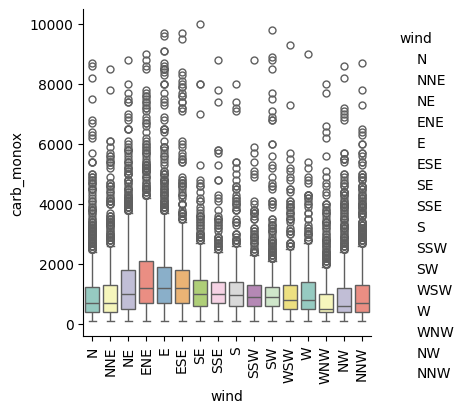

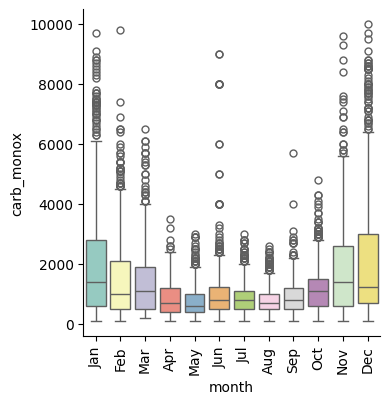

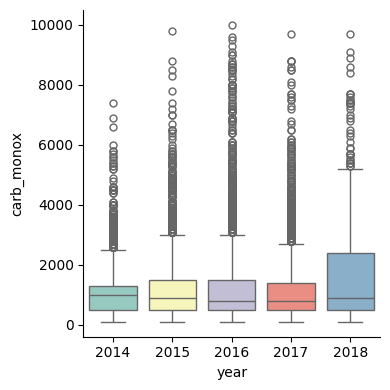

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

sorted_vals = ['N', 'NNE', 'NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
sns.catplot(data=df, x='wind', y="carb_monox", kind="box", order=sorted_vals, palette="Set3", height=4).tick_params(axis='x', rotation=90)

sorted_vals = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]
sns.catplot(data=df, x='month', y="carb_monox", kind="box", order=sorted_vals, palette="Set3", height=4).tick_params(axis='x', rotation=90)

sorted_vals = [str(x) for x in range(2014,2019)]
sns.catplot(data=df, x='year', y="carb_monox", kind="box", order=sorted_vals, palette="Set3", height=4)

In [17]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 
dummies.tail()

wind_ENE  wind_ESE  wind_N  wind_NE  wind_NNE  wind_NNW  wind_NW  \
13995     False     False   False    False     False     False    False   
13996     False      True   False    False     False     False    False   
13997      True     False   False    False     False     False    False   
13998     False     False   False    False     False     False    False   
13999     False     False   False    False      True     False    False   

       wind_S  wind_SE  wind_SSE  ...  month_Jun  month_Mar  month_May  \
13995   False    False     False  ...      False      False      False   
13996   False    False     False  ...      False      False      False   
13997   False    False     False  ...      False      False      False   
13998   False    False     False  ...      False      False      False   
13999   False    False     False  ...      False       True      False   

       month_Nov  month_Oct  month_Sep  year_2015  year_2016  year_2017  \
13995      False      False      False       True      False      False   
13996      False      False      False      False       True      False   
13997       True      False      False      False      False       True   
13998      False      False       True       True      False      False   
13999      False      False      False      False      False       True   

       year_2018  
13995      False  
13996      False  
13997      False  
13998      False  
13999      False  

[5 rows x 31 columns]

## Numerical data

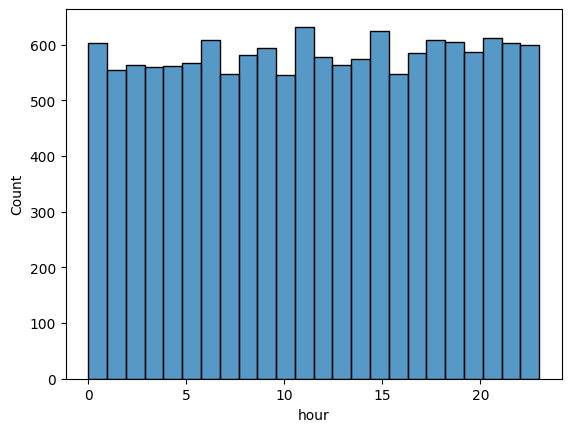

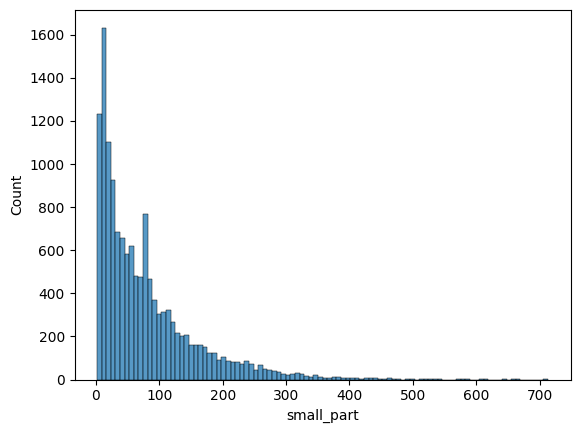

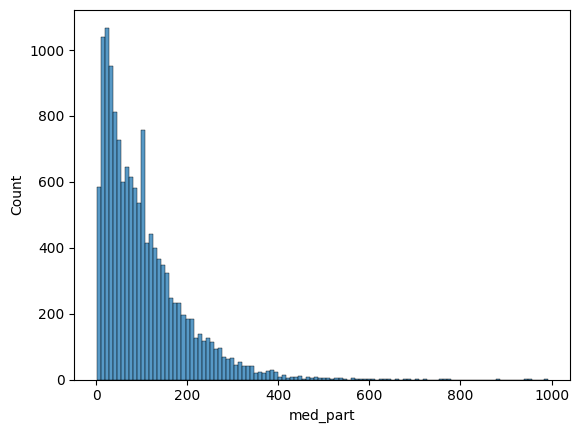

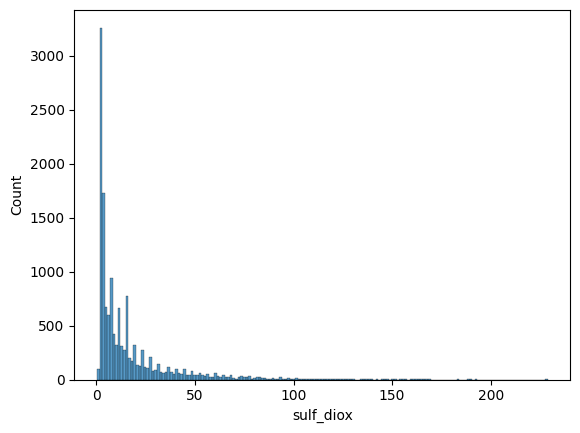

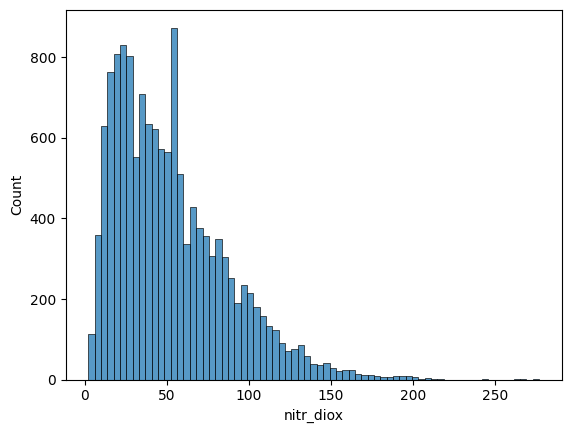

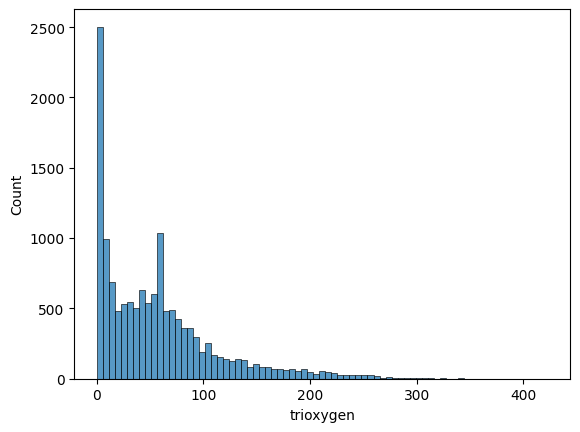

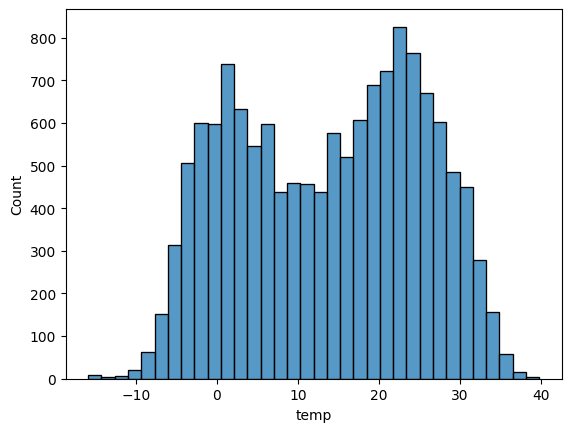

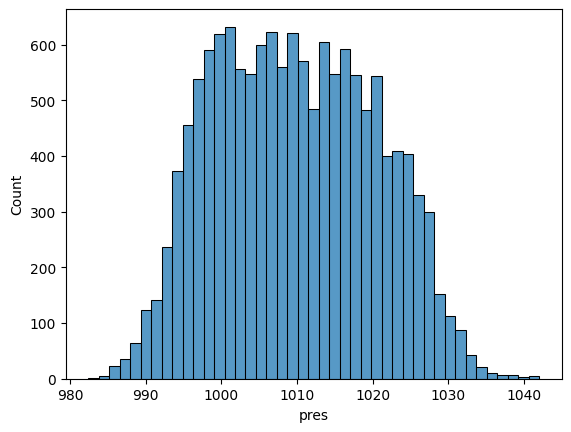

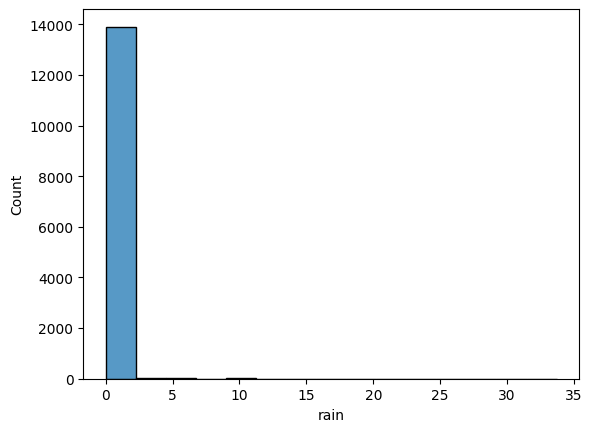

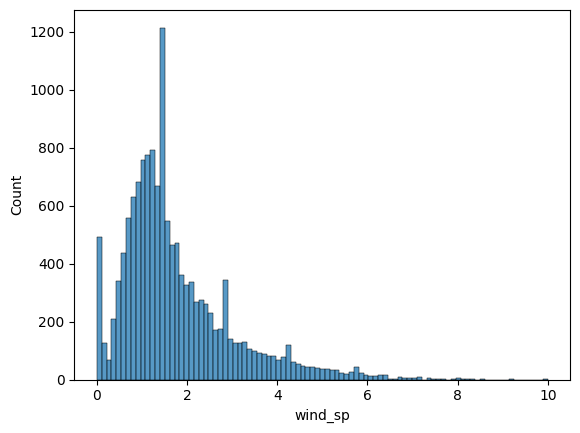

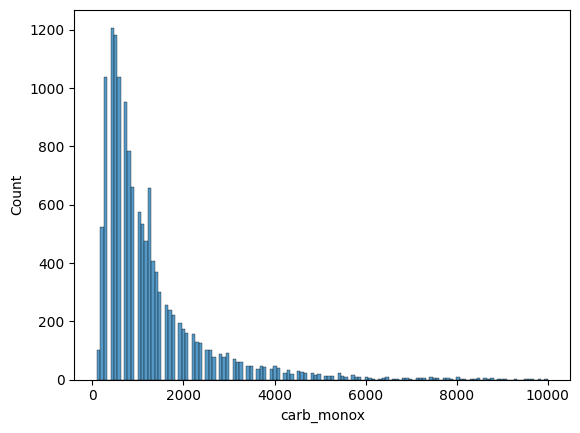

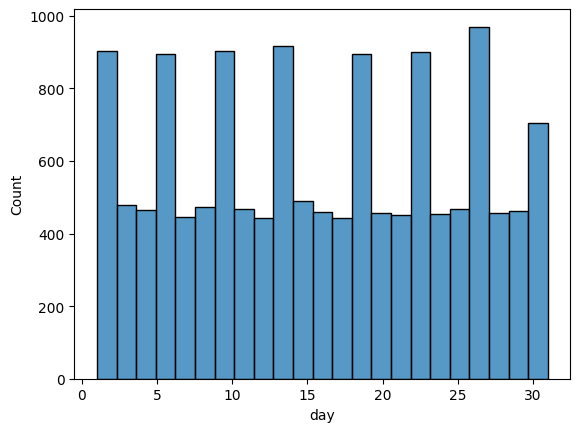

In [18]:
#df_numerical.hist(figsize=(15,15))

for i,col in enumerate(df_numerical.columns):
    plt.figure(i)
    ax = sns.histplot(data=df_numerical, x=df_numerical[col])

In [19]:
df.day.value_counts()

day
26    507
15    489
3     478
8     472
11    469
10    469
25    469
4     464
18    463
27    463
29    462
16    460
14    459
20    458
13    457
28    457
24    454
2     453
22    452
21    451
1     450
6     448
7     447
23    447
5     446
17    443
12    442
9     434
19    433
30    414
31    290
Name: count, dtype: int64

In [20]:
df.columns

Index(['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'rain', 'wind', 'wind_sp', 'carb_monox', 'day', 'month',
       'year'],
      dtype='object')

In [21]:
df_numerical['log_rain']=np.log(df_numerical['rain']+1)
df_numerical['log_small_part']=np.log(df_numerical['small_part']+1)
df_numerical['log_med_part']=np.log(df_numerical['med_part']+1)
df_numerical['log_sulf_diox']=np.log(df_numerical['sulf_diox']+1)
df_numerical['log_carb_monox']=np.log(df_numerical['carb_monox']+1)



In [22]:
df_numerical.drop(['small_part', 'med_part', 'sulf_diox', 'rain', 'log_rain', 'carb_monox'],axis=1, inplace=True)

array([[<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'nitr_diox'}>,
        <Axes: title={'center': 'trioxygen'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'pres'}>,
        <Axes: title={'center': 'wind_sp'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'log_small_part'}>,
        <Axes: title={'center': 'log_med_part'}>],
       [<Axes: title={'center': 'log_sulf_diox'}>,
        <Axes: title={'center': 'log_carb_monox'}>, <Axes: >]],
      dtype=object)

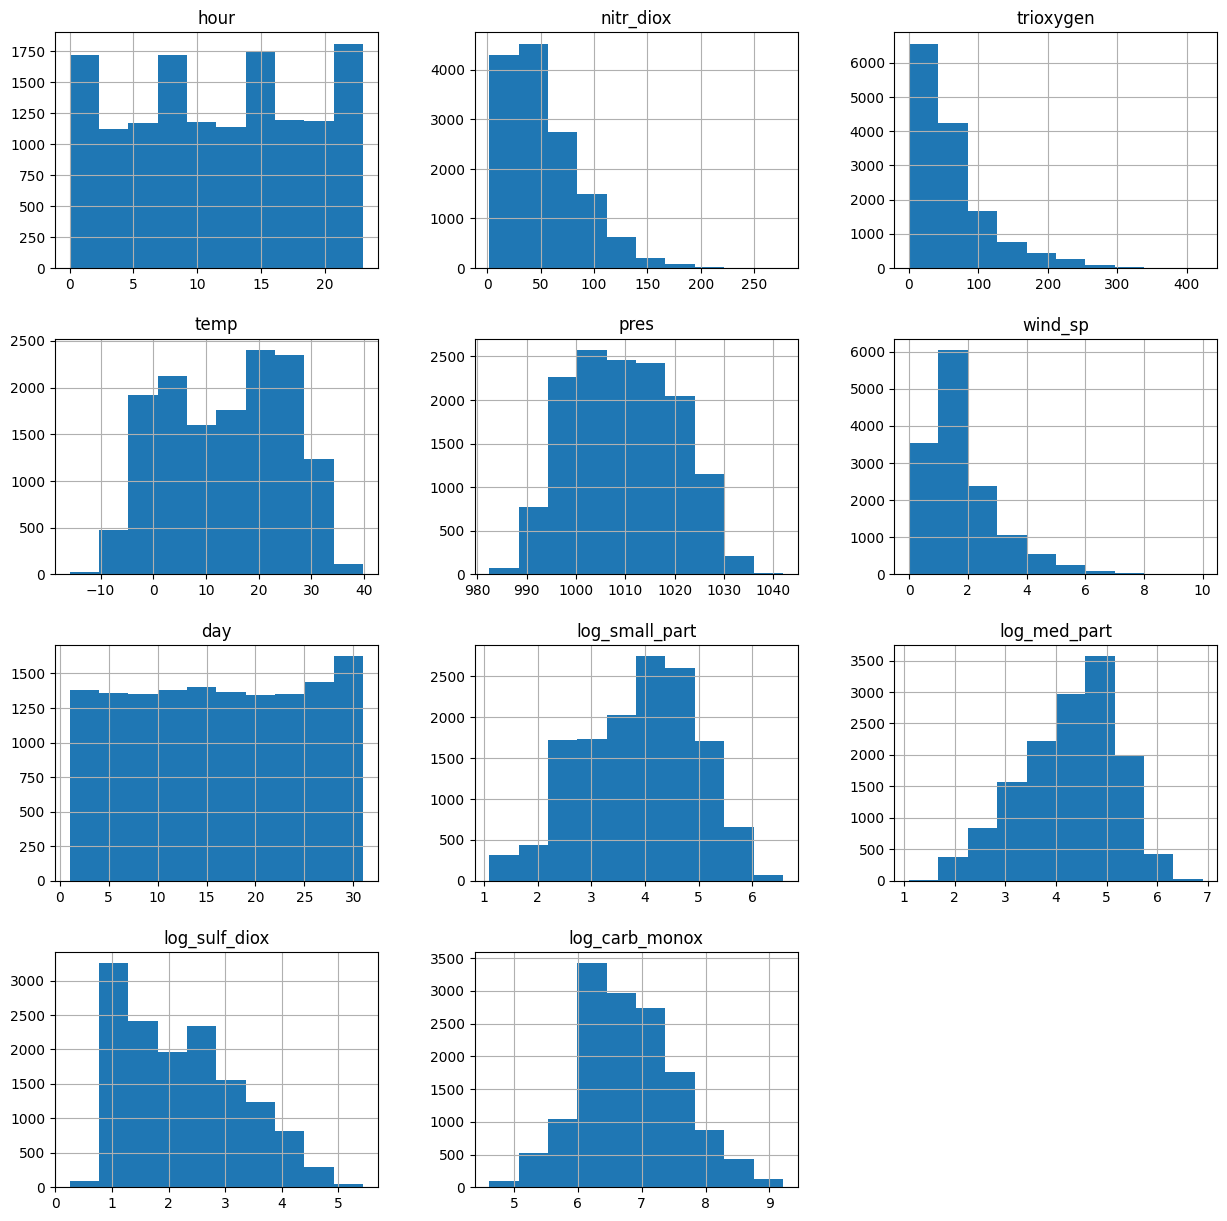

In [23]:
df_numerical.hist(figsize=(15,15))

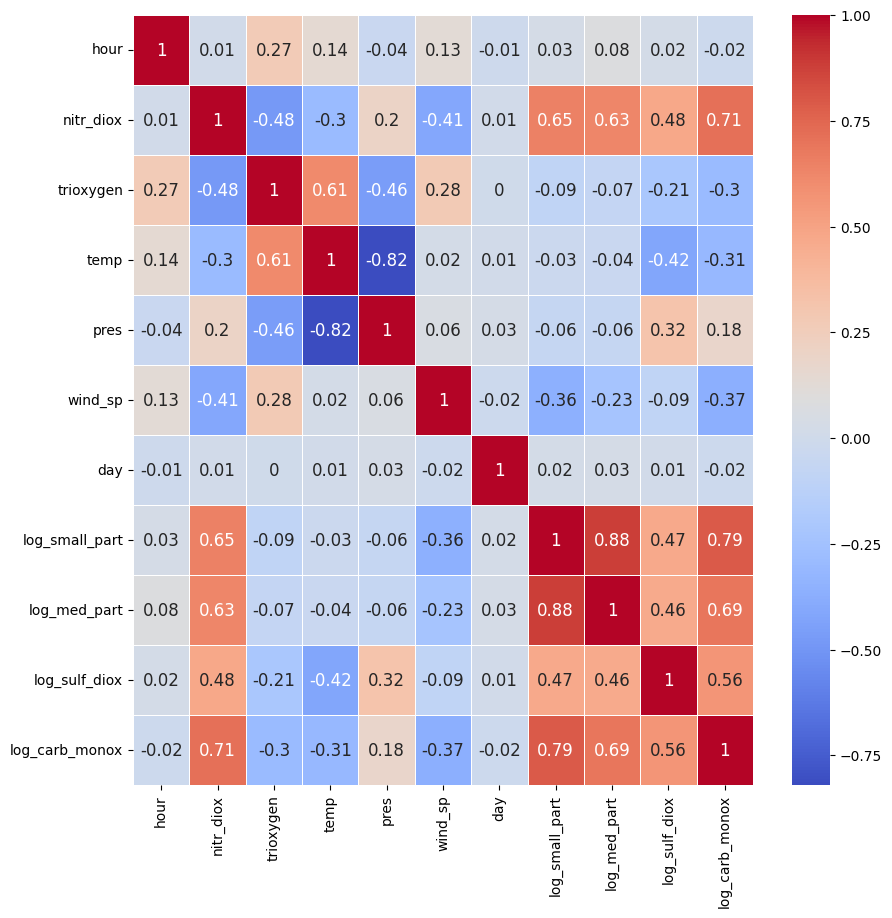

In [24]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

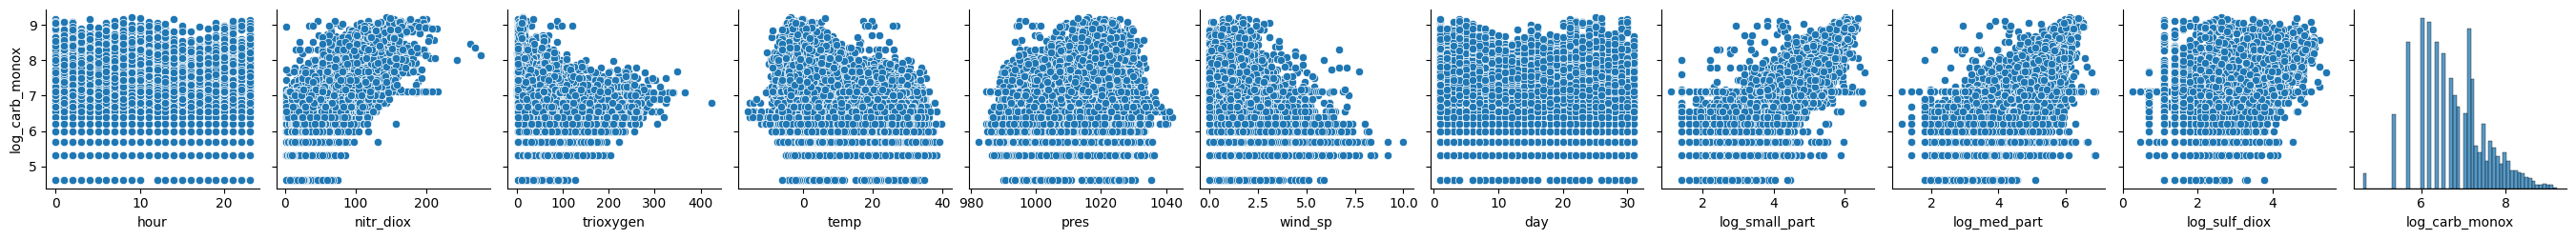

In [25]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='log_carb_monox')

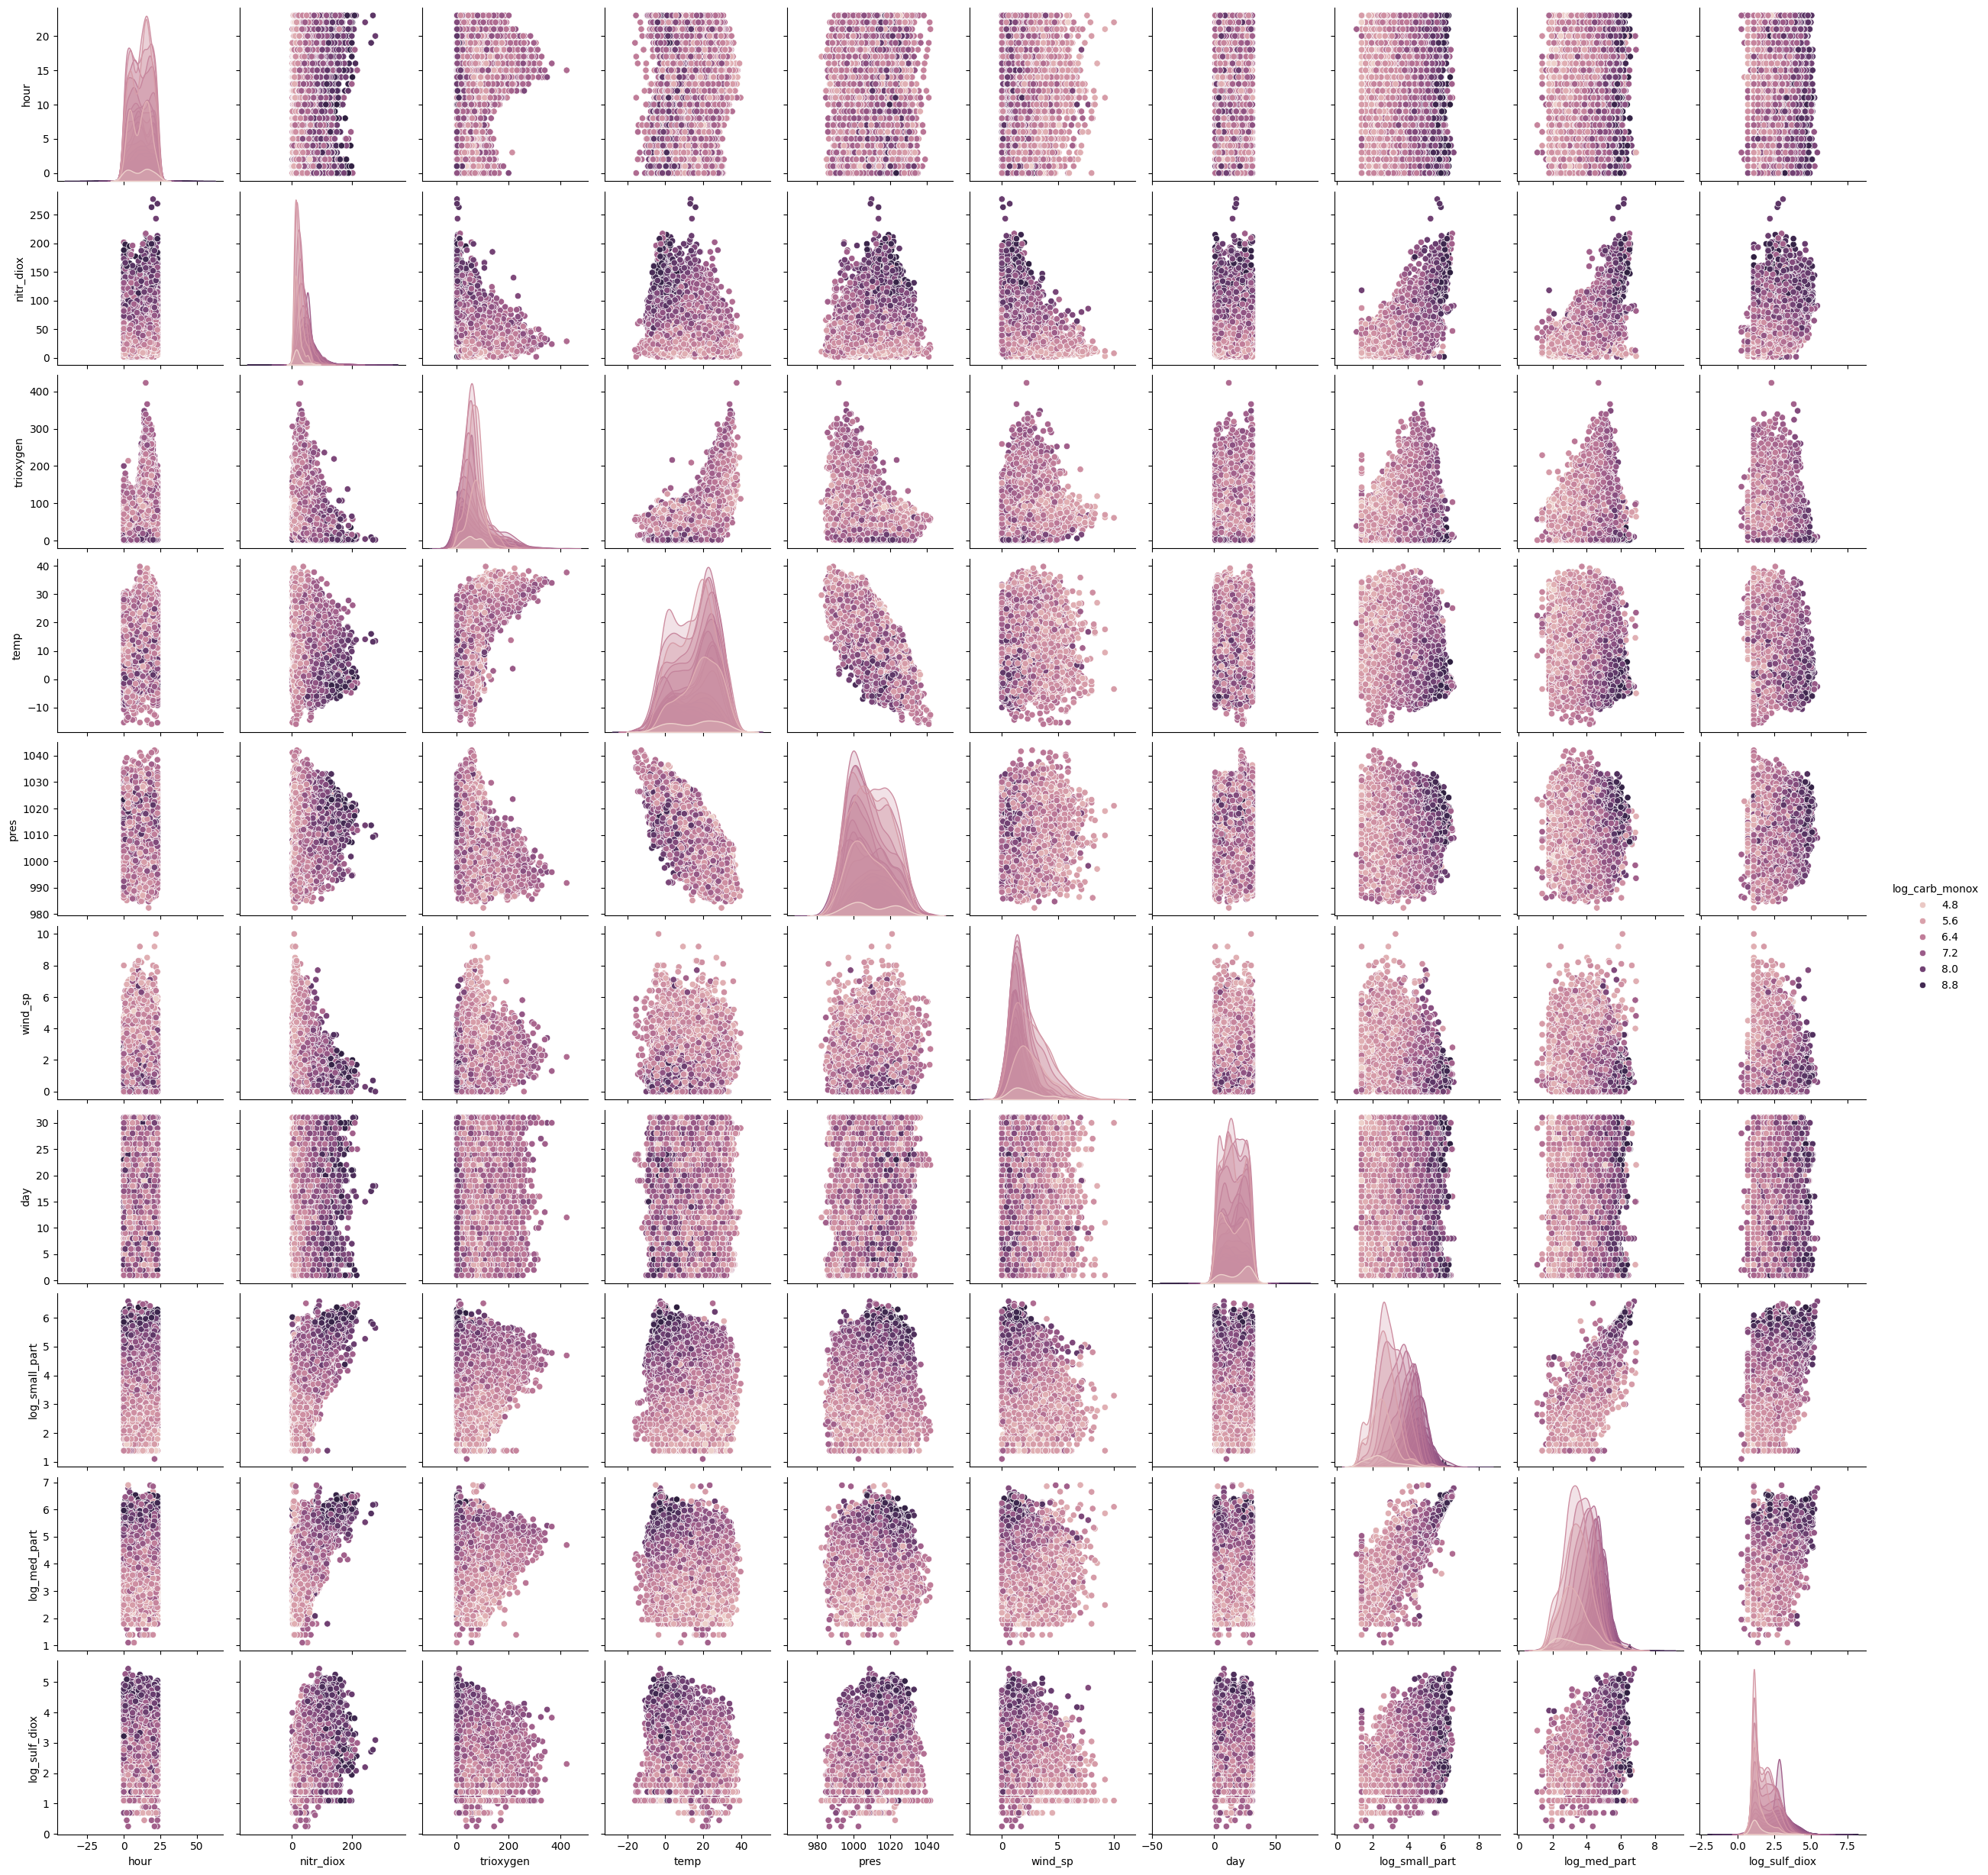

In [26]:
sns.pairplot(df_numerical, hue='log_carb_monox')

## Standarize

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

hour  nitr_diox  trioxygen      temp      pres   wind_sp       day  \
0  1.640549  -0.965029  -0.508910 -0.539238  1.098403  0.600621  0.812969   
1  1.352166   0.621487  -0.850160 -1.204674  0.499790 -0.853181 -0.771672   
2  1.352166  -0.272731   2.526422  1.360756 -0.839961 -1.095481 -0.545294   
3 -0.089749   0.000000  -0.670554  0.038640  0.518794  0.116020  1.492101   
4 -1.675855  -0.128502  -0.742397 -1.292231  1.373955 -0.368580 -0.998049   

   log_small_part  log_med_part  log_sulf_diox  log_carb_monox  
0       -1.173090     -0.509620      -1.561441       -1.865579  
1        0.441622      0.515522       1.165008        1.077697  
2        0.544277      0.729388       0.021214       -0.298914  
3        0.462424      0.405636       0.546492        0.400024  
4        0.441622     -0.217482       1.432416        0.476616

<Axes: >

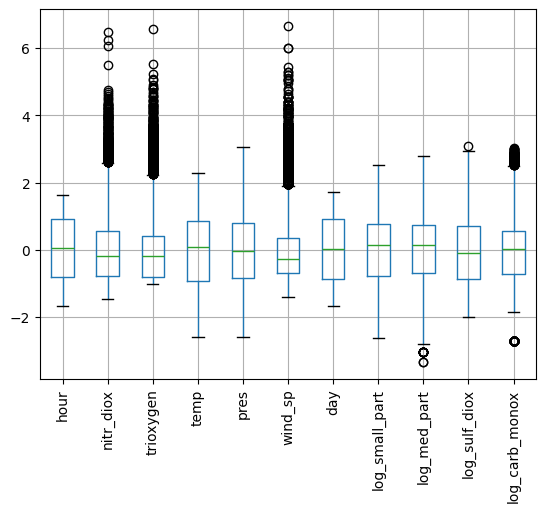

In [28]:
scaled_df.boxplot(rot=90)

In [29]:
scaled_df

hour  nitr_diox  trioxygen      temp      pres   wind_sp       day  \
0      1.640549  -0.965029  -0.508910 -0.539238  1.098403  0.600621  0.812969   
1      1.352166   0.621487  -0.850160 -1.204674  0.499790 -0.853181 -0.771672   
2      1.352166  -0.272731   2.526422  1.360756 -0.839961 -1.095481 -0.545294   
3     -0.089749   0.000000  -0.670554  0.038640  0.518794  0.116020  1.492101   
4     -1.675855  -0.128502  -0.742397 -1.292231  1.373955 -0.368580 -0.998049   
...         ...        ...        ...       ...       ...       ...       ...   
13995  0.919592  -0.734263   1.736158  1.562138 -1.695122 -0.045513 -0.658483   
13996  0.198634  -0.388114  -0.688515 -1.117117  0.214737  0.842921  0.473403   
13997 -0.378132   0.765716  -0.993844 -1.318498  1.706517 -0.449347  0.926158   
13998 -1.099089  -0.070811  -0.670554  0.660297 -0.193840 -1.418548 -1.677181   
13999 -0.522323  -0.676572   0.047867 -1.344766  1.307442 -0.045513 -0.884860   

       log_small_part  log_med_part  log_sulf_diox  log_carb_monox  
0           -1.173090     -0.509620      -1.561441       -1.865579  
1            0.441622      0.515522       1.165008        1.077697  
2            0.544277      0.729388       0.021214       -0.298914  
3            0.462424      0.405636       0.546492        0.400024  
4            0.441622     -0.217482       1.432416        0.476616  
...               ...           ...            ...             ...  
13995       -0.936837     -1.454834      -0.879829       -0.999405  
13996        0.806578      0.506366      -0.481111        0.736842  
13997       -0.367027     -0.049271      -0.198217        0.812828  
13998        0.441622      0.095819      -1.162723        0.147866  
13999       -1.588443     -1.065964      -0.879829       -0.999405  

[14000 rows x 11 columns]

In [30]:
X_numerical=scaled_df.drop(['log_carb_monox'],axis=1)

In [31]:
X_numerical.head()

hour  nitr_diox  trioxygen      temp      pres   wind_sp       day  \
0  1.640549  -0.965029  -0.508910 -0.539238  1.098403  0.600621  0.812969   
1  1.352166   0.621487  -0.850160 -1.204674  0.499790 -0.853181 -0.771672   
2  1.352166  -0.272731   2.526422  1.360756 -0.839961 -1.095481 -0.545294   
3 -0.089749   0.000000  -0.670554  0.038640  0.518794  0.116020  1.492101   
4 -1.675855  -0.128502  -0.742397 -1.292231  1.373955 -0.368580 -0.998049   

   log_small_part  log_med_part  log_sulf_diox  
0       -1.173090     -0.509620      -1.561441  
1        0.441622      0.515522       1.165008  
2        0.544277      0.729388       0.021214  
3        0.462424      0.405636       0.546492  
4        0.441622     -0.217482       1.432416

In [32]:
print(dummies.shape)
print(X_numerical.shape)


(14000, 31)
(14000, 10)


In [33]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

wind_ENE  wind_ESE  wind_N  wind_NE  wind_NNE  wind_NNW  wind_NW  \
13995     False     False   False    False     False     False    False   
13996     False      True   False    False     False     False    False   
13997      True     False   False    False     False     False    False   
13998     False     False   False    False     False     False    False   
13999     False     False   False    False      True     False    False   

       wind_S  wind_SE  wind_SSE  ...      hour  nitr_diox  trioxygen  \
13995   False    False     False  ...  0.919592  -0.734263   1.736158   
13996   False    False     False  ...  0.198634  -0.388114  -0.688515   
13997   False    False     False  ... -0.378132   0.765716  -0.993844   
13998   False    False     False  ... -1.099089  -0.070811  -0.670554   
13999   False    False     False  ... -0.522323  -0.676572   0.047867   

           temp      pres   wind_sp       day  log_small_part  log_med_part  \
13995  1.562138 -1.695122 -0.045513 -0.658483       -0.936837     -1.454834   
13996 -1.117117  0.214737  0.842921  0.473403        0.806578      0.506366   
13997 -1.318498  1.706517 -0.449347  0.926158       -0.367027     -0.049271   
13998  0.660297 -0.193840 -1.418548 -1.677181        0.441622      0.095819   
13999 -1.344766  1.307442 -0.045513 -0.884860       -1.588443     -1.065964   

       log_sulf_diox  
13995      -0.879829  
13996      -0.481111  
13997      -0.198217  
13998      -1.162723  
13999      -0.879829  

[5 rows x 41 columns]

### Separate Train/Test sets


In [34]:
y=df_numerical['log_carb_monox']

In [35]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(9800, 41) (4200, 41)


## Models

In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np


def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
        
    from sklearn import metrics
    print("-- LOG --")
    print("MAE  train %.3f    test %.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )
    print("-- ORIGINAL SCALE -- ")
    print("MAE  train %.3f    test %.3f" % (metrics.mean_absolute_error(np.exp(y_train), np.exp(y_pred_train)), metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_test)) ) )
    print("MSE  train %.3f  test %.3f" % (metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred_train)), metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_test))) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred_train))), np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(np.exp(y_train), np.exp(y_pred_train)), metrics.r2_score(np.exp(y_test), np.exp(y_pred_test))) )

In [37]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.278011 using {}
-- LOG --
MAE  train 0.277    test 0.281
MSE  train 0.148 test 0.151
RMSE train 0.385   test 0.389
r2   train 0.766     test 0.765
-- ORIGINAL SCALE -- 
MAE  train 325.442    test 330.319
MSE  train 381005.471  test 396790.037
RMSE train 617.256   test 629.913
r2   train 0.721     test 0.720


In [38]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.278002 using {'alpha': 1}
-- LOG --
MAE  train 0.277    test 0.281
MSE  train 0.148 test 0.151
RMSE train 0.385   test 0.389
r2   train 0.766     test 0.765
-- ORIGINAL SCALE -- 
MAE  train 325.477    test 330.350
MSE  train 381167.693  test 396805.441
RMSE train 617.388   test 629.925
r2   train 0.721     test 0.720


In [39]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.279035 using {'alpha': 0.001}
-- LOG --
MAE  train 0.278    test 0.283
MSE  train 0.150 test 0.153
RMSE train 0.387   test 0.391
r2   train 0.763     test 0.763
-- ORIGINAL SCALE -- 
MAE  train 327.599    test 332.112
MSE  train 386481.684  test 395868.136
RMSE train 621.677   test 629.181
r2   train 0.717     test 0.721


In [40]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(10,30,5),
              'p': [1,2]
            }

gs_regression(regressor, parameters)

C:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


***GRIDSEARCH RESULTS***
Best score: -0.262885 using {'n_neighbors': 15, 'p': 1}
-- LOG --
MAE  train 0.237    test 0.254
MSE  train 0.109 test 0.122
RMSE train 0.330   test 0.349
r2   train 0.828     test 0.811
-- ORIGINAL SCALE -- 
MAE  train 273.880    test 288.291
MSE  train 272317.330  test 284546.315
RMSE train 521.840   test 533.429
r2   train 0.800     test 0.799


In [41]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,10), 
              "min_samples_leaf": [5]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.298450 using {'max_depth': 7, 'min_samples_leaf': 5}
-- LOG --
MAE  train 0.265    test 0.293
MSE  train 0.134 test 0.162
RMSE train 0.366   test 0.403
r2   train 0.788     test 0.748
-- ORIGINAL SCALE -- 
MAE  train 302.419    test 334.292
MSE  train 310983.149  test 378981.110
RMSE train 557.659   test 615.614
r2   train 0.772     test 0.732


In [42]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,200], "criterion": ['squared_error'], 
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.257635 using {'criterion': 'squared_error', 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 42}
-- LOG --
MAE  train 0.197    test 0.254
MSE  train 0.082 test 0.128
RMSE train 0.287   test 0.358
r2   train 0.870     test 0.801
-- ORIGINAL SCALE -- 
MAE  train 227.321    test 289.011
MSE  train 206619.155  test 290414.652
RMSE train 454.554   test 538.901
r2   train 0.849     test 0.795


In [43]:
'''
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear']#,'poly'],
             #'degree': [2]
             }

gs_regression(regressor, parameters)
'''

"\nfrom sklearn.svm import SVR\n\nregressor = SVR()\nparameters = {'C': [0.1,10,1000],\n             'epsilon': [0.01,1],\n             'gamma':['auto'],\n             'kernel': ['linear']#,'poly'],\n             #'degree': [2]\n             }\n\ngs_regression(regressor, parameters)\n"

In [44]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[10000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.256451 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'sgd'}
-- LOG --
MAE  train 0.249    test 0.255
MSE  train 0.122 test 0.129
RMSE train 0.350   test 0.359
r2   train 0.806     test 0.800
-- ORIGINAL SCALE -- 
MAE  train 286.999    test 292.492
MSE  train 306333.140  test 326699.781
RMSE train 553.474   test 571.577
r2   train 0.775     test 0.769


In [45]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[100,300,500], "learning_rate":[0.001, 0.01,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.316565 using {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 300, 'random_state': 0}
-- LOG --
MAE  train 0.314    test 0.318
MSE  train 0.175 test 0.180
RMSE train 0.419   test 0.424
r2   train 0.723     test 0.721
-- ORIGINAL SCALE -- 
MAE  train 372.825    test 374.664
MSE  train 492756.494  test 506450.226
RMSE train 701.966   test 711.653
r2   train 0.639     test 0.642


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,150,300], "learning_rate":[0.1,0.5,1,2], 
              "loss": ['squared_error'], "random_state" : [0] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.259473 using {'learning_rate': 0.5, 'loss': 'squared_error', 'max_depth': 2, 'n_estimators': 300, 'random_state': 0}
-- LOG --
MAE  train 0.217    test 0.254
MSE  train 0.090 test 0.126
RMSE train 0.300   test 0.355
r2   train 0.858     test 0.805
-- ORIGINAL SCALE -- 
MAE  train 247.011    test 288.182
MSE  train 208636.626  test 294856.223
RMSE train 456.768   test 543.007
r2   train 0.847     test 0.792


## Variable contribution: Shap values

$$\phi_j(val)=\sum_{S\subseteq\{x_{1},\ldots,x_{p}\}\setminus\{x_j\}}\frac{|S|!\left(p-|S|-1\right)!}{p!}\left(val\left(S\cup\{x_j\}\right)-val(S)\right)$$

In [47]:
# Install the package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} shap
#!{sys.executable} -m pip install shap

In [48]:
X.columns


Index(['wind_ENE', 'wind_ESE', 'wind_N', 'wind_NE', 'wind_NNE', 'wind_NNW',
       'wind_NW', 'wind_S', 'wind_SE', 'wind_SSE', 'wind_SSW', 'wind_SW',
       'wind_W', 'wind_WNW', 'wind_WSW', 'wind_nan', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'hour', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'wind_sp', 'day', 'log_small_part', 'log_med_part',
       'log_sulf_diox'],
      dtype='object')

In [49]:
X.head()

wind_ENE  wind_ESE  wind_N  wind_NE  wind_NNE  wind_NNW  wind_NW  wind_S  \
0     False     False   False    False     False      True    False   False   
1     False     False   False    False     False     False    False   False   
2     False     False   False    False     False     False    False   False   
3     False      True   False    False     False     False    False   False   
4     False     False   False    False     False     False    False   False   

   wind_SE  wind_SSE  ...      hour  nitr_diox  trioxygen      temp      pres  \
0    False     False  ...  1.640549  -0.965029  -0.508910 -0.539238  1.098403   
1    False     False  ...  1.352166   0.621487  -0.850160 -1.204674  0.499790   
2    False      True  ...  1.352166  -0.272731   2.526422  1.360756 -0.839961   
3    False     False  ... -0.089749   0.000000  -0.670554  0.038640  0.518794   
4    False     False  ... -1.675855  -0.128502  -0.742397 -1.292231  1.373955   

    wind_sp       day  log_small_part  log_med_part  log_sulf_diox  
0  0.600621  0.812969       -1.173090     -0.509620      -1.561441  
1 -0.853181 -0.771672        0.441622      0.515522       1.165008  
2 -1.095481 -0.545294        0.544277      0.729388       0.021214  
3  0.116020  1.492101        0.462424      0.405636       0.546492  
4 -0.368580 -0.998049        0.441622     -0.217482       1.432416  

[5 rows x 41 columns]

In [50]:
categorical_features=list(range(30))

In [51]:
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [52]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(criterion='squared_error', min_samples_leaf= 10, n_estimators=200)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=10, n_estimators=200)

In [53]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test) 
        

from sklearn import metrics
print("-- LOG --")
print("MAE  train %.3f    test %.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )
print("-- ORIGINAL SCALE -- ")
print("MAE  train %.3f    test %.3f" % (metrics.mean_absolute_error(np.exp(y_train), np.exp(y_pred_train)), metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_test)) ) )
print("MSE  train %.3f  test %.3f" % (metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred_train)), metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_test))) ) 
print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_pred_train))), np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))) ) 
print("r2   train %.3f     test %.3f" % (metrics.r2_score(np.exp(y_train), np.exp(y_pred_train)), metrics.r2_score(np.exp(y_test), np.exp(y_pred_test))) )

-- LOG --
MAE  train 0.197    test 0.254
MSE  train 0.082 test 0.128
RMSE train 0.286   test 0.358
r2   train 0.870     test 0.802
-- ORIGINAL SCALE -- 
MAE  train 226.992    test 288.472
MSE  train 205434.086  test 289503.303
RMSE train 453.248   test 538.055
r2   train 0.849     test 0.796


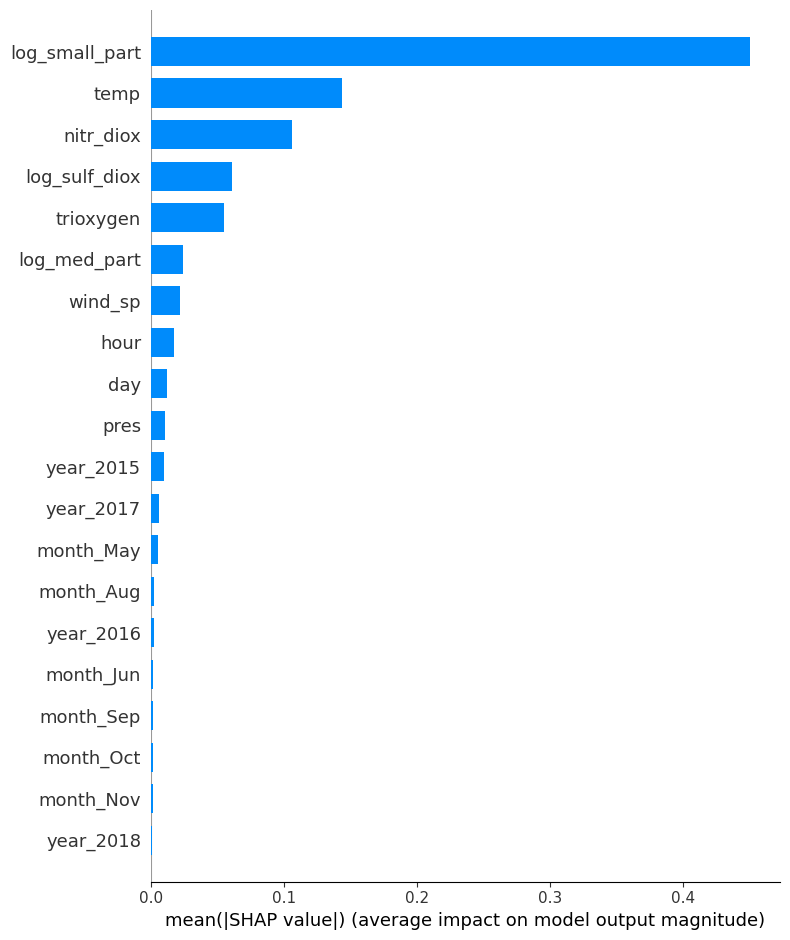

In [54]:
import shap  

explainer_rf = shap.TreeExplainer(rf)#,categorical_features=categorical_features)
shap_values = explainer_rf.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")


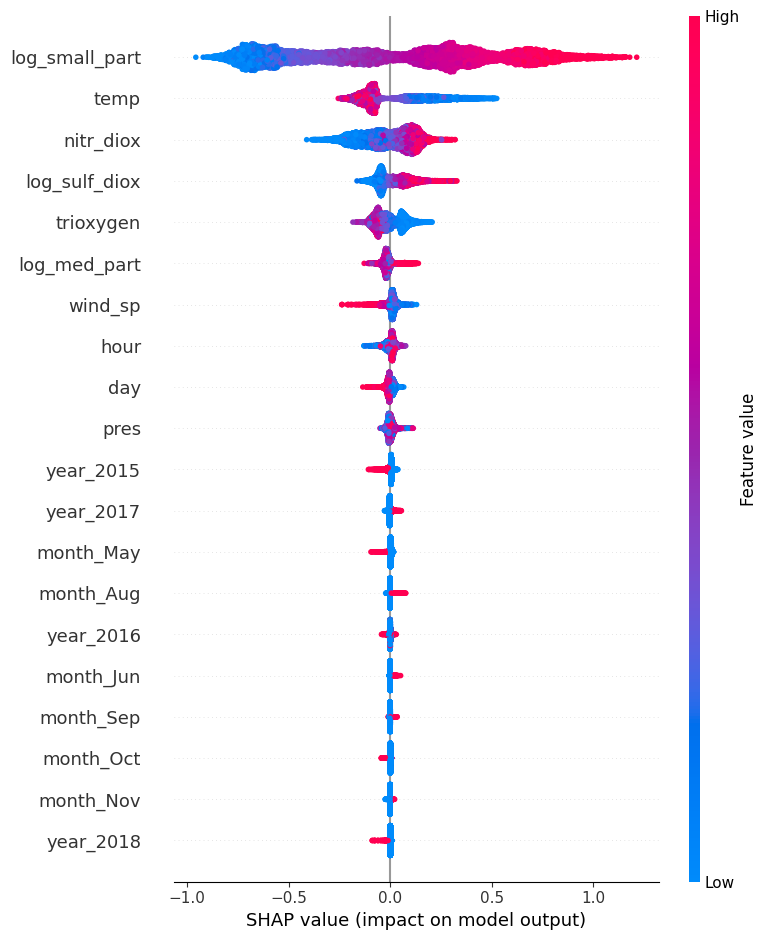

In [55]:
shap.initjs()
shap.summary_plot(shap_values, X_train)


In [56]:
i=10
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])